#Assignment1

In [59]:
import IPython
from google.colab import output
display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button");
     btn.click()
     }
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect");
     btn.click()
     }
  }
setInterval(ClickConnect,60000)
'''))
print("Done.")

<IPython.core.display.Javascript object>

Done.


In [60]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
%cd /content/gdrive/My\ Drive/ML/Programming_Assignment_1/

/content/gdrive/My Drive/ML/Programming_Assignment_1


In [62]:
%ls

21100088_Assignment1.ipynb             kNN.pdf         test.csv
GoogleNews-vectors-negative300.bin.gz  stop_words.txt  train.csv


In [63]:
#imports
import pandas as pd
import numpy as np
import string
import re 
from scipy.spatial import distance
from array import *

#Pre Processing


In [64]:
with open('stop_words.txt') as s:
   content = s.readlines()

In [65]:
stop_words = []
A = []

In [66]:
for x in content:
  word = x.strip()
  stop_words.append(word)

In [67]:
#stop_words

In [68]:
train_data = pd.read_csv('train.csv')

In [69]:
#train_data

In [70]:
def preprocess(x): # This is pre processing
    final_list = []
    list_final = []
    
    x = x.lower()
    #remove URL
    x = re.sub("http[:/.a-zA-z0-9]+|https[:/.a-zA-z0-9]+", '', x) #Removing links by targetting the link format
    x = re.sub("\.\.+",' ',x)   #Removing series of dots
    #split thing
    wordlist = re.split('[!;\-#?/%$&\s]', x)  #Splitting the words who have a symbol between them
    #go word by word to remove punctuation etc
    for word in wordlist:
        word = re.sub('[@!0-9]*', '', word) #Remove Numbers
        #word = word.replace('-','')
        item = word.strip(string.punctuation) #Remove punctuations
        if item not in stop_words and item is not '': 
          list_final.append(item)
    return list_final

In [71]:
s = train_data['Tweet'][0]
s

'@united 877 from amsterdam to ewr, 02.27.2015, 737-300.'

In [72]:
preprocess(s)

['united', 'amsterdam', 'ewr']

In [73]:

train_data['Processed Tweet'] = train_data['Tweet'].map(preprocess)
#train_data

In [74]:
vocab = [];

In [75]:
def make_dictionary(x):   #Making My list of words
  #print(x);
  for word in x:
    if word not in vocab: 
      vocab.append(word)

In [76]:
for item in train_data['Processed Tweet']: #Making my vocabalary using the above function
    make_dictionary(item)


In [77]:
# print(vocab)

In [78]:
# len(vocab)

In [79]:
BOW = []

In [80]:
# Making a bag of words for Training data.
# iterate through my processed tweet gives me a list of words of each tweet
# so it becomes a list in a list, hence the two for loops
for wordlist in train_data['Processed Tweet']:
  Tweet = [0]*len(vocab)
  for word in wordlist:
    a = vocab.index(word)
    Tweet[a] += 1
  #if  Tweet[a] > 1:
  BOW.append(Tweet) 
      

In [81]:
bow = np.asarray(BOW)

In [82]:
bow.shape
#Tweet

(11680, 10962)

In [83]:
S = []
S = bow.sum(axis =0)

#TASK1 KNN_Implementation


In [84]:
import pickle
import gc
from collections import Counter

In [85]:
test_data = pd.read_csv('test.csv') # Loading the test data

In [86]:
BOW_test = []

In [87]:
# Making a bag of words for Testing data.
#what i do is make a new colunm of processed tweets after mapping the preprocess on the whole data frame
# and then iterate through that, my processed tweet gives me a list of words of each tweet
# so it becomes a list in a list, hence the two for loops
# basically i iterating over training data to make freq table of Test tweets
test_data['Processed Tweet'] = test_data['Tweet'].map(preprocess)

for a in test_data['Processed Tweet']:
  test_Tweet = [0]*len(vocab)
  for word in a:
    if word in vocab:              
      x = vocab.index(word)
      test_Tweet[x] += 1
  BOW_test.append(test_Tweet)



In [88]:
bow_test = np.asarray(BOW_test) #Converting list into an array
bow_test.shape

(2921, 10962)

In [89]:
y = distance.cdist(bow_test,bow, 'euclidean') #calculating distances, output is again a 2D array

In [90]:
y.shape

(2921, 11680)

In [91]:
ydist = y.tolist() # making a list of list of distances

In [92]:
len(ydist)

2921

In [93]:
# ydist

In [94]:
a = train_data['Sentiment'][1]
a

'negative'

In [95]:
train_sen = list(train_data["Sentiment"])
 


In [96]:
train_sen[0]

'neutral'

In [97]:
def k_n_n(k,dist):

  while k>0:
    # print(a)
    label_k = []
    dist = np.array(dist)   #i pass a distance list to this function, argsort basically returns me a list of indexes 
    kn = dist.argsort()[:k] # distances are sorted and then their indexes are stored so i can access k_nearest
    # kn = kn.tolist()
    # print(kn)
    for i in kn:
      # print(a)
      sen = train_sen[i]  #Accessing k nearest
      label_k.append(sen)

    b = Counter(label_k)
    
    # pred = b.most_common()
#Here i am comparing the most common results and returning the 1 most common label.
    if len(b) == 1:
      return b.most_common(1)[0][0]

    elif len(b) == 2:
      if b.most_common(2)[0][1] == b.most_common(2)[1][1]:
        k -= 1
      elif b.most_common(2)[0][1] > b.most_common(2)[1][1]:
        return b.most_common(2)[0][0]
      elif b.most_common(2)[0][1] < b.most_common(2)[1][1]:
        return b.most_common(2)[1][0]

    elif len(b) == 3:
      if b.most_common(3)[0][1] == b.most_common(3)[1][1] and b.most_common(3)[0][1] == b.most_common(3)[2][1]:
        k -= 1
      elif b.most_common(3)[0][1] > b.most_common(3)[1][1] and b.most_common(3)[0][1] > b.most_common(3)[2][1] or b.most_common(3)[0][1] > b.most_common(3)[2][1] and b.most_common(3)[0][1] == b.most_common(3)[1][1] :
        return b.most_common(3)[0][0]
      elif b.most_common(3)[1][1] > b.most_common(3)[0][1] and b.most_common(3)[1][1] > b.most_common(3)[2][1] or b.most_common(3)[1][1] > b.most_common(3)[2][1] and b.most_common(3)[1][1] == b.most_common(3)[0][1] :
        return b.most_common(3)[1][0]
      elif b.most_common(3)[2][1] > b.most_common(3)[0][1] and b.most_common(3)[2][1] > b.most_common(3)[1][1] or b.most_common(3)[2][1] > b.most_common(3)[1][1] and b.most_common(3)[2][1] == b.most_common(3)[0][1] :
        return b.most_common(3)[2][0]
    
  

In [98]:
def confusion_matrix():
  a,b,c,d,e,f,g,h,i = 0,0,0,0,0,0,0,0,0
#for confusion matrix for pred_positive row 
  for k in range(len(test_data['Sentiment'])):
    if test_data['Predicted Sentiment'][k] == 'positive' and test_data['Sentiment'][k] == 'positive':
      a += 1
    elif test_data['Predicted Sentiment'][k] == 'positive' and test_data['Sentiment'][k] == 'neutral':
      b += 1
    elif test_data['Predicted Sentiment'][k] == 'positive' and test_data['Sentiment'][k] == 'negative':
      c += 1 

# for confusion matrix for pred_neutral row
    if test_data['Predicted Sentiment'][k] == 'neutral' and test_data['Sentiment'][k] == 'positive':
      d += 1
    elif test_data['Predicted Sentiment'][k] == 'neutral' and test_data['Sentiment'][k] == 'neutral':
      e += 1
    elif test_data['Predicted Sentiment'][k] == 'neutral' and test_data['Sentiment'][k] == 'negative':
      f += 1 

# Confusion matrix for pred_negative row 

    if test_data['Predicted Sentiment'][k] == 'negative' and test_data['Sentiment'][k] == 'positive':
      g += 1
    elif test_data['Predicted Sentiment'][k] == 'negative' and test_data['Sentiment'][k] == 'neutral':
      h += 1
    elif test_data['Predicted Sentiment'][k] == 'negative' and test_data['Sentiment'][k] == 'negative':
      i += 1
  
  confuse_matrix = [[a, b, c], [d, e, f], [g, h, i]]
  #Basically i get a 3D matrix as a result in row wise fassion,

  # print(confuse_matrix)
  return confuse_matrix

  

In [99]:
def accuracy(a,b,c,d,e,f,g,h,i):  ## passing a 3D matrix and calculting performance
  acc = ((a+e+i)/(a+b+c+d+e+f+g+h+i))*100
  return acc

In [100]:
def precision(a,b,c,d,e,f,g,h,i): ## 
  prec_pos = ((a)/(a+b+c))
  prec_neut = ((e)/(d+e+f))
  prec_neg = ((i)/(g+h+i))

  prec = (prec_pos + prec_neut + prec_neg)/3 #Calculating Macro precision

  return prec

In [101]:
def recall(a,b,c,d,e,f,g,h,i): 
  rec_pos = ((a)/(a+d+g))
  rec_neut = ((e)/(b+e+h))
  rec_neg = ((i)/(c+f+i))

  rec = (rec_pos + rec_neut + rec_neg)/3 #macro recall

  return rec

In [102]:
def F1_score(p,r):  ## precision and recall
  f1 = ((2*p*r)/(p+r))

  return f1

In [103]:
test_data['Predicted Sentiment'] = None

In [104]:
import matplotlib.pyplot as plt

In [105]:
k = [1,3,5,7,10]  # My main function you can just change values of K here

ac = []
pr = []
rc = []
fs = [] 
for ind in k:
  ind = int(ind)
  C = []
  for i in range(len(test_data['Tweet'])):
    dist = ydist[i]
    pred = k_n_n(ind,dist)
    test_data['Predicted Sentiment'][i] = pred

  C = confusion_matrix()
  a = C[0][0] 
  b = C[0][1] 
  c = C[0][2]
  d = C[1][0] 
  e = C[1][1] 
  f = C[1][2]
  g = C[2][0] 
  h = C[2][1] 
  i = C[2][2]
  accu = accuracy(a,b,c,d,e,f,g,h,i)
  ac.append(accu)
  pre  = precision(a,b,c,d,e,f,g,h,i)*100
  pr.append(pre)
  rec = recall(a,b,c,d,e,f,g,h,i)*100
  rc.append(rec)

  f1 = F1_score(pre,rec)
  fs.append(f1)

  print("Performance for k = ",ind)
  print("accuracy", accu)
  print("Precision", pre)
  print("Recall",rec)

  print("F1 Score",f1)
  print("-----------------------------------------------")


Performance for k =  1
accuracy 51.21533721328312
Precision 52.39721072730769
Recall 55.04609282595423
F1 Score 53.68899931649391
-----------------------------------------------
Performance for k =  3
accuracy 49.9828825744608
Precision 52.2113047445556
Recall 55.58849884194089
F1 Score 53.847000769350444
-----------------------------------------------
Performance for k =  5
accuracy 48.54501882916809
Precision 51.478562760592474
Recall 54.66780128358
F1 Score 53.02527061952385
-----------------------------------------------
Performance for k =  7
accuracy 47.17562478603218
Precision 50.45484172890022
Recall 54.23636960756425
F1 Score 52.277309805979016
-----------------------------------------------
Performance for k =  10
accuracy 46.45669291338583
Precision 50.80994013063732
Recall 54.90629536445264
F1 Score 52.77875374956009
-----------------------------------------------


Text(0.5, 1.0, 'Accruacy Performance Graph')

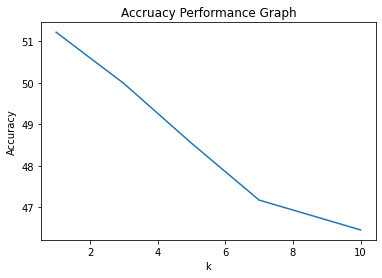

In [106]:
# plt.figure()
plt.plot(k,ac)

plt.xlabel('k')  
plt.ylabel('Accuracy') 
plt.title('Accruacy Performance Graph')


Text(0.5, 1.0, 'Precision Performance Graph')

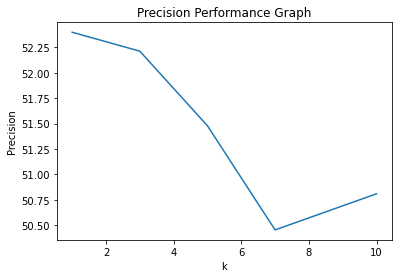

In [107]:
plt.figure()
plt.plot(k,pr)
plt.xlabel('k')  
plt.ylabel('Precision') 
plt.title('Precision Performance Graph')


Text(0.5, 1.0, 'Recall Performance Graph')

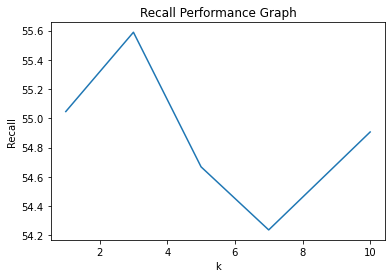

In [108]:
plt.figure()
plt.plot(k,rc)
plt.xlabel('k')  
plt.ylabel('Recall') 
plt.title('Recall Performance Graph')


Text(0.5, 1.0, 'F1 Performance Graph')

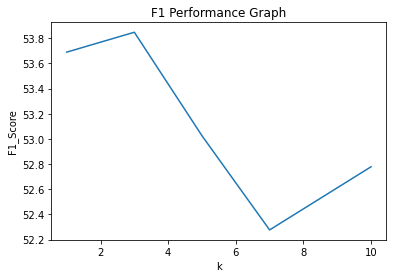

In [109]:
plt.figure()
plt.plot(k,fs)
plt.xlabel('k')  
plt.ylabel('F1_Score') 
plt.title('F1 Performance Graph')

# Task2 Sklearn 

In [110]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [111]:
test_sen = list(test_data['Sentiment'])

In [112]:

euc_dist = []
pred = []
name = ['negative' , 'neutral','positive'] # labels assigned 
p2 = []
r2 = []
f2 = []
ac2 = []

k_nearest = [1,3,5,7,10]


for ind in k_nearest:
  nearest = KNeighborsClassifier(ind, algorithm = 'brute') # it uses brute algo and returns me nearest neighbours
  nearest.fit(bow,train_sen)  #Fits the model of training and its freq

  prediction = nearest.predict(bow_test)  #predicts the testing tweets sentiment

  print('Confusion Matrix')
  print(confusion_matrix(test_sen,prediction, labels = name))
  print('Classification Report')
  print(classification_report(test_sen,prediction, labels = name))
  ac = accuracy_score(test_sen,prediction)

  class_rep = classification_report(test_sen,prediction, labels = name, output_dict= True) #using dict type so i can access the table

  print("Accuracy for k = ",ind," ",ac)

  print('-----------------------------')
  # print("Classification Report")
  class_rep = np.asarray(class_rep)
  class_rep = class_rep.tolist()
  # print(class_rep)
                                          #Accessing the individual values for plotting
  p = class_rep['macro avg']['precision']
  p2.append(p)
  
  r = class_rep['macro avg']['recall']
  r2.append(r)

  f = class_rep['macro avg']['f1-score']
  f2.append(f)

  ac2.append(ac)


Confusion Matrix
[[878 718 238]
 [125 347 143]
 [ 61 147 264]]
Classification Report
              precision    recall  f1-score   support

    negative       0.83      0.48      0.61      1834
     neutral       0.29      0.56      0.38       615
    positive       0.41      0.56      0.47       472

    accuracy                           0.51      2921
   macro avg       0.51      0.53      0.49      2921
weighted avg       0.64      0.51      0.54      2921

Accuracy for k =  1   0.5097569325573433
-----------------------------
Confusion Matrix
[[861 711 262]
 [106 352 157]
 [ 64 112 296]]
Classification Report
              precision    recall  f1-score   support

    negative       0.84      0.47      0.60      1834
     neutral       0.30      0.57      0.39       615
    positive       0.41      0.63      0.50       472

    accuracy                           0.52      2921
   macro avg       0.52      0.56      0.50      2921
weighted avg       0.65      0.52      0.54      292

[0.5097569325573433, 0.5166039027730229, 0.5196850393700787, 0.49058541595344063, 0.47723382403286546]


Text(0.5, 1.0, 'Accruacy Performance Graph')

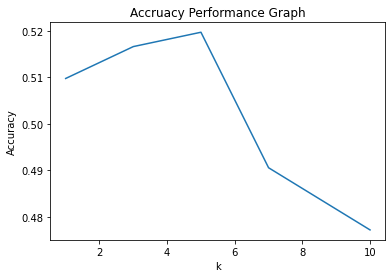

In [113]:
print(ac2)
plt.figure()
plt.plot(k,ac2)
plt.xlabel('k')  
plt.ylabel('Accuracy') 
plt.title('Accruacy Performance Graph')

[0.5069313086230812, 0.5162240080877223, 0.5352929945889474, 0.5133521148778918, 0.505603360254549]


Text(0.5, 1.0, 'Precision Performance Graph')

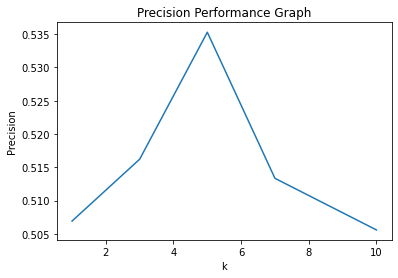

In [114]:
print(p2)
plt.figure()
plt.plot(k,p2)
plt.xlabel('k')  
plt.ylabel('Precision') 
plt.title('Precision Performance Graph')

[0.5340948938757636, 0.5563140054999981, 0.5631156247841428, 0.5469512257734631, 0.5415317864294478]


Text(0.5, 1.0, 'Recall Performance Graph')

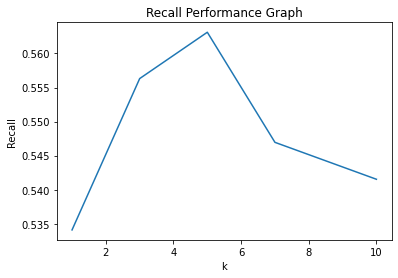

In [115]:
print(r2)
plt.figure()
plt.plot(k,r2)
plt.xlabel('k')  
plt.ylabel('Recall') 
plt.title('Recall Performance Graph')

[0.48616251195713484, 0.49769317327653234, 0.5078273496155287, 0.48002734119682405, 0.46721487419927454]


Text(0.5, 1.0, 'F1 Performance Graph')

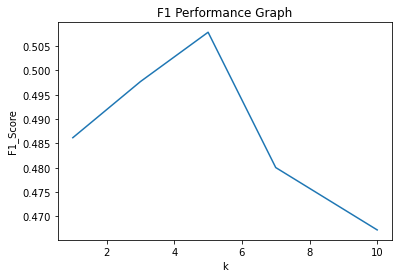

In [116]:
print(f2)
plt.figure()
plt.plot(k,f2)
plt.xlabel('k')  
plt.ylabel('F1_Score') 
plt.title('F1 Performance Graph')